### **Import Libraries** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Loading data (only one case as an example)**

In [3]:
"""first column belongs to sensor_1 and the second column belongs to sensor_2
Here, we use the measurement of sensor_1
"""
df = pd.read_csv("../input/vibration-dataset-for-bolt-loosening-detection/Case1/Case1_1000.csv")
df.head()

In [4]:
signal = df.iloc[:, -2].values
signal.shape

## **Visualization of the row signal**

In [5]:
plt.plot(signal)
plt.xlabel("Number of samples")
plt.ylabel("Amplitude")
plt.title("Row vibration signal")

## **Time domain feature extruction methods (statistical approach)**

## Mathematical expressions

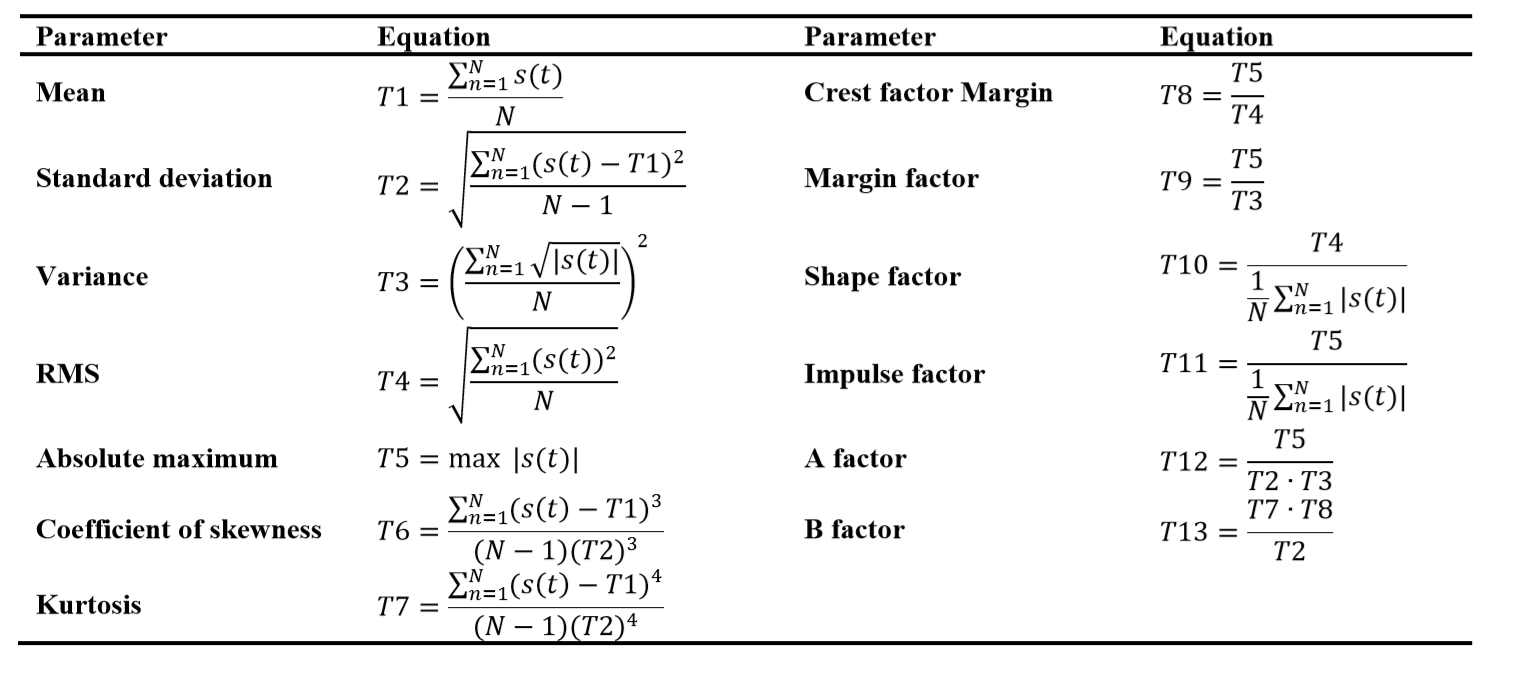

## Coding part

In [6]:
def get_peak_acceleration(signal, frame_size, hop_length):
    peak = []
    for i in range(0, len(signal), hop_length):
        current_frame = max(signal[i:i+frame_size])
        peak.append(current_frame)
    return np.array(peak)


def get_rms_acceleration(signal, frame_size, hop_length):
    rms = []
    for i in range(0, len(signal), hop_length):
        current_rms = np.sqrt(np.sum(signal[i:i+frame_size]**2)/frame_size)
        rms.append(current_rms)
    return rms


def get_crest_factor(signal, frame_size, hop_length):
    return get_peak_acceleration(signal, frame_size, hop_length)/get_rms_acceleration(signal, frame_size, hop_length)



def get_std(signal, frame_size, hop_length):
    fin_std = []
    for i in range(0, len(signal), hop_length):
        current_std = np.std(signal[i:i+frame_size])
        fin_std.append(current_std)
    return fin_std


def get_variance(signal, frame_size, hop_length):
    fin_var = []
    for i in range(0, len(signal), hop_length):
        current_var = np.var(signal[i:i+frame_size])
        fin_var.append(current_var)
    return fin_var



from scipy.stats import skew

def get_skewness(signal, frame_size, hop_length):
    fin_skew = []
    for i in range(0, len(signal), hop_length):
        current_skew = skew(signal[i:i+frame_size])
        fin_skew.append(current_skew)
    return fin_skew



from scipy.stats import kurtosis

def get_kurtosis(signal, frame_size, hop_length):
    fin_kurt = []
    for i in range(0, len(signal), hop_length):
        current_kurt = kurtosis(signal[i:i+frame_size])
        fin_kurt.append(current_kurt)
    return fin_kurt


def get_shape_factor(signal, frame_size, hop_length):
    fin_shape_fact = []
    for i in range(0, len(signal), hop_length):
        cur_shape_fact = np.sqrt(((np.sum(signal[i:i+frame_size]**2))/frame_size) / (np.sum(np.abs(signal[i:i+frame_size]))/frame_size))
        fin_shape_fact.append(cur_shape_fact)

    return fin_shape_fact



def get_impulse_factor(signal, frame_size, hop_length):
    impulse_factor = []
    for i in range(0, len(signal), hop_length):
        current_impls = max(np.abs(signal[i:i+frame_size]))/(np.sum(np.abs(signal[i:i+frame_size])/frame_size))
        impulse_factor.append(current_impls)
    return impulse_factor


def get_margin_factor(signal, frame_size, hop_length):
    mar_fac = []
    for i in range(0, len(signal), hop_length):
        curr_mar_fac = np.max(np.abs(signal[i:i+frame_size])) / ((np.sum(np.sqrt(np.abs(signal[i:i+frame_size])))/ frame_size**2))
        mar_fac.append(curr_mar_fac)                             
    return mar_fac


def get_mean_acceleration(signal, frame_size, hop_length):
    mean = []
    for i in range(0, len(signal), hop_length):
        current_mean = np.sum(signal[i:i+frame_size])/frame_size
        mean.append(current_mean)
    return mean


def get_A_factor(signal, frame_size, hop_length):
    A_factor = []
    for i in range(0, len(signal), hop_length):
        current_factor = max(signal[i:i+frame_size])/(np.std(signal[i:i+frame_size])*np.var(signal[i:i+frame_size]))
        A_factor.append(current_factor)
    return A_factor



def get_B_factor(signal, frame_size, hop_length):
    return (get_kurtosis(signal, frame_size, hop_length)*get_crest_factor(signal, frame_size, hop_length))/get_std(signal, frame_size, hop_length)


In [7]:
list_features_function = [get_peak_acceleration, get_rms_acceleration, get_crest_factor,get_std, get_variance,
                          get_skewness, get_kurtosis, get_shape_factor, get_impulse_factor, get_margin_factor,
                         get_mean_acceleration, get_A_factor, get_B_factor]

print('Number of feature extruction methods: ', len(list_features_function))

In [8]:
def get_all_fetures(X, frame_size, hop_length):
    stationary_features = []
    for func in list_features_function:
        f = func(signal, frame_size, hop_length)
        stationary_features.append(f)
    return stationary_features

In [9]:
features = get_all_fetures(signal, frame_size=1024, hop_length=512)
np.array(features).T.shape

## **Preparing dataset for ML**

In [10]:
ready_data=pd.DataFrame({'Peak': np.array(features).T[:, 0],
                         'RMS': np.array(features).T[:, 1],
                         'Crest factor': np.array(features).T[:, 2],
                         'STD': np.array(features).T[:, 3],
                         'Variance': np.array(features).T[:, 4],
                         'Skewness': np.array(features).T[:, 5],
                         'Kurtosis': np.array(features).T[:, 6],
                         'Shape factor': np.array(features).T[:, 7],
                         'Impulse factor': np.array(features).T[:, 8],
                         'Margin': np.array(features).T[:, 9],
                         'Mean': np.array(features).T[:, 10],
                         'A factor': np.array(features).T[:, 11],
                         'B factor': np.array(features).T[:, 12]
                        })


# ready_data.to_csv('submission.csv', index=False)

In [11]:
ready_data.head()

## **Data Analysis**

In [12]:
ready_data.info()

In [13]:
import missingno as mso

plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(ready_data,ax=ax_train,fontsize = 12)

# **Thanks! Keep going!**